# Problem statement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Libraries for Scraping the data
import requests 
from bs4 import BeautifulSoup

#from selenium import webdriver
import time
import re
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
URL = 'https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=mobiles%7CMobiles&requestId=8ba7f5c5-303a-422b-a4e5-8fb379c94165&as-searchtext=mobiles'

In [3]:
#URL ='https://www.flipkart.com/search?q=mobiles&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [4]:
page = requests.get(URL)

In [5]:
page.status_code

200

In [6]:
pagecontent = page.text
print(pagecontent)

<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7f97aa.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-t

In [7]:
soup = BeautifulSoup(pagecontent)
print(soup)

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.7f97aa.css" rel="stylesheet"/><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><meta content="noodp" name="robots"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name="og_site_name" property="og:site_name"/><link href="/apple-touch-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/><link href="/apple-touch-icon-72x72.png" rel="apple-touch-icon" sizes="72x72"/><link href="/appl

In [8]:
product_details = soup.findAll('div',attrs = {'class':'_3pLy-c row'})

In [9]:
for product in product_details:
    
    #Mobile
    i = product.find('div', attrs = {'class': '_4rR01T'})
    if i is None:
        print(np.NaN)
    else:
        print(i.text)
        
    #Rating
    j = product.find('div', attrs = {'class':'_3LWZlK'})
    if j is None:
        print(np.NaN)
    else:
        print(j.text)
        
    #price
    k = product.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
    if k is None:
        print(np.NaN)
    else:
        print(k.text)
        
    #Features
    l = []
    m= product.find('ul', attrs = {'class':'_1xgFaf'})
    for li in m:
        l.append(li.text)
    print(l)
    
    #discount%
    n = product.find('div', attrs = {'class': '_3Ay6Sb'})
    if n is None:
        print(np.NaN)
    else:
        print(n.text)
        
    #price before discount
    
    o = product.find('div',attrs = {'class':'_3I9_wc _27UcVY'})
    if o is None:
        print(np.NaN)
    else:
        print(o.text)
        
    #exchange or nocost emi
    p = product.find('div',attrs = {'class':'_2ZdXDB'})
    if p is None:
        print(np.NaN)
    else:
        print(p.text)
        
    print('-'*100)

POCO M3 (Power Black, 64 GB)
4.3
₹11,499
['6 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '16.59 cm (6.53 inch) Full HD+ Display', '48MP + 2MP + 2MP | 8MP Front Camera', '6000 mAh Lithium-ion Polymer Battery', 'Qualcomm Snapdragon 662 Processor', 'One Year Warranty for Handset, 6 Months for Accessories']
11% off
₹12,999
Upto ₹10,900 Off on Exchange
----------------------------------------------------------------------------------------------------
REDMI 9 Prime (Mint Green, 64 GB)
4.4
₹9,999
['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '16.59 cm (6.53 inch) Full HD+ Display', '13MP + 8MP + 5MP + 2MP | 8MP Front Camera', '5020 mAh Battery', 'MediaTek Helio G80 Processor', '1 Year Manufacturer Warranty']
16% off
₹11,999
Upto ₹9,450 Off on Exchange
----------------------------------------------------------------------------------------------------
realme C21 (Cross Blue, 64 GB)
4.4
₹9,499
['4 GB RAM | 64 GB ROM | Expandable Upto 256 GB', '16.51 cm (6.5 inch) HD+ Display', '13MP + 2M

In [10]:
mobile = []
ratings = []
price = []
features = []
discount_per = []
actual_price = []
emi_exchange = []

for x in range(1,31):
    start_time = time.time()
    URL = 'https://www.flipkart.com/search?q=mobiles&sid=tyy%2C4io&as=on&as-show=on&otracker=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&otracker1=AS_QueryStore_OrganicAutoSuggest_1_7_na_na_na&as-pos=1&as-type=RECENT&suggestionId=mobiles%7CMobiles&requestId=8ba7f5c5-303a-422b-a4e5-8fb379c94165&as-searchtext=mobiles'
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    product_details = soup.findAll('div', attrs={'class':'_3pLy-c row'})
    for product in product_details:
        
        #mobile name
        i = product.find('div',attrs = {'class': '_4rR01T'})
        if i is None:
            mobile.append(np.NaN)
        else:
            mobile.append(i.text)
            
         #Ratings
        j = product.find('div',attrs = {'class':'_3LWZlK'})
        if j is None:
            ratings.append(np.NaN)
        else:
            ratings.append(j.text)
            
        #price
        k = product.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        if k is None:
            price.append(np.NaN)
        else:
            price.append(k.text)
            
         #features
        l = []
        m = product.find('ul', attrs = {'class':'_1xgFaf'})
        for li in m:
            l.append(li.text)
        features.append(l)
        
        # % of discount
        n = product.find('div', attrs = {'class': '_3Ay6Sb'})
        if n is None:
            discount_per.append(np.NaN)
        else:
            discount_per.append(n.text)
        
        #price before discount
    
        o = product.find('div',attrs = {'class':'_3I9_wc _27UcVY'})
        if o is None:
            actual_price.append(np.NaN)
        else:
            actual_price.append(o.text)
        
        
        #exchange or nocost emi
        
        p = product.find('div',attrs = {'class':'_2ZdXDB'})
        if p is None:
            emi_exchange.append(np.NaN)
        else:
            emi_exchange.append(p.text)
        
        
        
    
    end_time = time.time()
    print('Page {} completed in {} seconds.'.format(x, end_time-start_time))
        

Page 1 completed in 0.13164424896240234 seconds.
Page 2 completed in 0.12067866325378418 seconds.
Page 3 completed in 0.10372090339660645 seconds.
Page 4 completed in 0.14362382888793945 seconds.
Page 5 completed in 0.17951250076293945 seconds.
Page 6 completed in 0.11768507957458496 seconds.
Page 7 completed in 0.1466078758239746 seconds.
Page 8 completed in 0.12267422676086426 seconds.
Page 9 completed in 0.12865376472473145 seconds.
Page 10 completed in 0.12665867805480957 seconds.
Page 11 completed in 0.11473751068115234 seconds.
Page 12 completed in 0.1874537467956543 seconds.
Page 13 completed in 0.12071990966796875 seconds.
Page 14 completed in 0.10966658592224121 seconds.
Page 15 completed in 0.12067532539367676 seconds.
Page 16 completed in 0.1296548843383789 seconds.
Page 17 completed in 0.09873604774475098 seconds.
Page 18 completed in 0.12769770622253418 seconds.
Page 19 completed in 0.1924443244934082 seconds.
Page 20 completed in 0.10675930976867676 seconds.
Page 21 compl

In [11]:
a = ({'Mobile':mobile,'Ratings':ratings,'ActualPrice':actual_price,  'Discount_per':discount_per,'Price':price,'Features':features,'Emi_Exchange':emi_exchange})
df = pd.DataFrame.from_dict(a, orient='index')
df = df.transpose()

In [12]:
df

,Mobile,Ratings,ActualPrice,Discount_per,Price,Features,Emi_Exchange
0,"POCO M3 (Power Black, 64 GB)",4.3,"₹12,999",11% off,"₹11,499",[6 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,"Upto ₹10,900 Off on Exchange"
1,"REDMI 9 Prime (Mint Green, 64 GB)",4.4,"₹11,999",16% off,"₹9,999",[4 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,"Upto ₹9,450 Off on Exchange"
2,"realme C21 (Cross Blue, 64 GB)",4.4,"₹10,999",13% off,"₹9,499",[4 GB RAM | 64 GB ROM | Expandable Upto 256 GB...,"Upto ₹8,950 Off on Exchange"
3,"realme C21 (Cross Blue, 32 GB)",4.4,"₹9,999",15% off,"₹8,499",[3 GB RAM | 32 GB ROM | Expandable Upto 256 GB...,"Upto ₹7,950 Off on Exchange"
4,"realme C21 (Cross Black, 32 GB)",4.4,"₹9,999",15% off,"₹8,499",[3 GB RAM | 32 GB ROM | Expandable Upto 256 GB...,"Upto ₹7,950 Off on Exchange"
...,...,...,...,...,...,...,...
715,"REDMI 9 Power (Blazing Blue, 64 GB)",4.3,"₹13,999",21% off,"₹10,999","[4 GB RAM | 64 GB ROM, 16.59 cm (6.53 inch) Fu...","Upto ₹10,250 Off on Exchange"
716,"REDMI Note 9 (Aqua Green, 64 GB)",4.3,"₹14,999",20% off,"₹11,999",[4 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,"Upto ₹11,450 Off on Exchange"
717,"POCO M3 (Power Black, 64 GB)",4.4,"₹11,999",12% off,"₹10,499",[4 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,NaN
718,"Infinix Hot 10 Play (Aegean Blue, 64 GB)",4.3,"₹9,999",10% off,"₹8,999",[4 GB RAM | 64 GB ROM | Expandable Upto 256 GB...,"Upto ₹8,450 Off on Exchange"


In [13]:
#df =df.to_csv('mobile_01.csv')

In [14]:
df.isnull().sum()

Mobile           0
Ratings          0
ActualPrice      0
Discount_per     0
Price            0
Features         0
Emi_Exchange    60
dtype: int64

In [15]:
df.Price = df.Price.str.replace('₹','').str.replace(',','').astype(float)

In [16]:
df.ActualPrice = df.ActualPrice.str.replace('₹','').str.replace(',','').astype(float)

In [17]:
df.Ratings = df.Ratings.str.replace(',','').astype(float)

###  Extracting the information from the Dataframe

In [18]:
df.Mobile.apply(lambda x:x).value_counts()

POCO M3 (Power Black, 64 GB)                   60
REDMI 9 Prime (Matte Black, 64 GB)             30
REDMI 9 Prime (Space Blue, 64 GB)              30
Infinix Hot 10 Play (Obsidian Black, 32 GB)    30
realme C20 (Cool Grey, 32 GB)                  30
POCO M2 Reloaded (Mostly Blue, 64 GB)          30
REDMI 9i (Nature Green, 64 GB)                 30
REDMI 9 Power (Blazing Blue, 64 GB)            30
REDMI 9i (Midnight Black, 64 GB)               30
REDMI 9 Prime (Mint Green, 64 GB)              30
Infinix Hot 10 Play (Aegean Blue, 64 GB)       30
realme C21 (Cross Black, 64 GB)                30
realme C21 (Cross Blue, 64 GB)                 30
REDMI Note 9 (Aqua Green, 64 GB)               30
Infinix Hot 10 Play (7° Purple, 64 GB)         30
realme C21 (Cross Black, 32 GB)                30
POCO C3 (Matte Black, 32 GB)                   30
realme C21 (Cross Blue, 32 GB)                 30
POCO M3 (Cool Blue, 64 GB)                     30
realme Narzo 30 5G (Racing Blue, 128 GB)       30


In [19]:
df.Features.apply(lambda x:x[0]).value_counts()
df.Features.apply(lambda x:x[1]).value_counts()
df.Features.apply(lambda x:x[3]).value_counts()
df.Features.apply(lambda x:x[4]).value_counts()

4 GB RAM | 64 GB ROM | Expandable Upto 512 GB    240
4 GB RAM | 64 GB ROM | Expandable Upto 256 GB    120
3 GB RAM | 32 GB ROM | Expandable Upto 256 GB     90
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB      60
6 GB RAM | 64 GB ROM | Expandable Upto 512 GB     60
2 GB RAM | 32 GB ROM | Expandable Upto 256 GB     60
4 GB RAM | 64 GB ROM                              60
3 GB RAM | 32 GB ROM | Expandable Upto 512 GB     30
Name: Features, dtype: int64

16.59 cm (6.53 inch) Full HD+ Display    300
16.51 cm (6.5 inch) HD+ Display          180
17.32 cm (6.82 inch) HD+ Display          90
16.59 cm (6.53 inch) HD+ Display          90
16.51 cm (6.5 inch) Full HD+ Display      60
Name: Features, dtype: int64

5000 mAh Battery                        240
5020 mAh Battery                        120
5000 mAh Lithium Polymer Battery         90
6000 mAh Lithium-ion Polymer Battery     90
6000 mAh Li-ion Polymer Battery          90
6000 mAh Battery                         60
5000 mAh Li-ion Polymer Battery          30
Name: Features, dtype: int64

MediaTek Helio G35 Processor                 270
Qualcomm Snapdragon 662 Processor            150
MediaTek Helio G80 Processor                 120
MediaTek Helio G25 Processor                  60
MediaTek Dimensity 700 (MT6833) Processor     60
MediaTek Helio G85 Processor                  30
Mediatek Helio G35 Processor                  30
Name: Features, dtype: int64

In [20]:
# converting list into stirng

df.Features = df.Features.apply(lambda x:','.join(x)) 
df.Mobile = df.Mobile.apply(lambda x:''.join(x))

In [21]:
print(df.Mobile[0])
print(df.Mobile[4])
print(df.Mobile[9])

POCO M3 (Power Black, 64 GB)
realme C21 (Cross Black, 32 GB)
REDMI 9i (Midnight Black, 64 GB)


In [22]:
print(df.Features[0])
print(df.Features[20])
print(df.Features[70])

6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 2MP + 2MP | 8MP Front Camera,6000 mAh Lithium-ion Polymer Battery,Qualcomm Snapdragon 662 Processor,One Year Warranty for Handset, 6 Months for Accessories
4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) Full HD+ Display,48MP + 8MP + 2MP + 2MP | 13MP Front Camera,5020 mAh Battery,MediaTek Helio G85 Processor,1 Year Manufacturer Warranty for Device and 6 months Manufacturer Warranty for In-box Accessories Including Batteries from the Date of Purchase
4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,17.32 cm (6.82 inch) HD+ Display,13MP + Depth Sensor | 8MP Front Camera,6000 mAh Li-ion Polymer Battery,MediaTek Helio G35 Processor,1 Year on Handset and 6 Months on Accessories


In [23]:
#Brand
Brand_regex = re.compile('^\w+ ')
Brand_regex.findall(df.Mobile[0])
df['Brand'] = df.Mobile.apply(lambda x:Brand_regex.findall(x))

['POCO ']

In [24]:
#mobile_name
Mobile_name_regex = re.compile(r'^\w+(.*\()')

Mobile_name_regex.findall(df.Mobile[0])
df['Mobile_name'] = df.Mobile.apply(lambda x:Mobile_name_regex.findall(x))

[' M3 (']

In [25]:
df.Mobile_name = df.Mobile_name.apply(lambda x:''.join(x))

In [26]:
list01=[]
for i in df['Mobile_name']:
    list01.append(i.split(' (')[0])

In [27]:
df.Mobile_name = list01

In [28]:
#Mobile_color
Mobile_color_regex = re.compile(r'\(\w*.*,')
Mobile_color_regex.findall(df.Mobile[0])
df['color'] = df.Mobile.apply(lambda x:Mobile_color_regex.findall(x))  

['(Power Black,']

In [29]:
df.color = df.color.apply(lambda x:''.join(x))

In [30]:
import regex as re

In [31]:
l=df['color'].apply(lambda x:re.sub('\W',' ',x).strip())

In [32]:
l[0]

'Power Black'

In [33]:
df['color'] = l

In [34]:
df['color']

0       Power Black
1        Mint Green
2        Cross Blue
3        Cross Blue
4       Cross Black
           ...     
715    Blazing Blue
716      Aqua Green
717     Power Black
718     Aegean Blue
719       7  Purple
Name: color, Length: 720, dtype: object

In [35]:
# RAM

RAM_regex = re.compile(r'[A-Za-z0-9\s]+RAM')
#RAM_regex = re.compile(r'[0-9\s]*GB[A-Za-z0-9\s]+RAM')

RAM_regex.findall(df.Features[0])
df['RAM'] = df.Features.apply(lambda x:RAM_regex.findall(x))

['6 GB RAM']

In [36]:
# ROM

ROM_regex = re.compile(r'[A-Za-z0-9\s]+ROM')
ROM_regex.findall(df.Features[0])
df['ROM'] = df.Features.apply(lambda x:ROM_regex.findall(x))

[' 64 GB ROM']

In [37]:
# Screensize_cm

Screen_regex = re.compile(r'[0-9a-zA-Z\s.]+cm')

Screen_regex.findall(df.Features[0])
df['Screensize_cm'] = df.Features.apply(lambda x:Screen_regex.findall(x))

['16.59 cm']

In [38]:
# Screensize_in

Screen_regex = re.compile(r'[0-9a-zA-Z\s.]+inch')

Screen_regex.findall(df.Features[0])
df['Screensize_in'] = df.Features.apply(lambda x:Screen_regex.findall(x))

['6.53 inch']

In [39]:
#Expandable memory
Expandable_regex = re.compile(r'([A-Za-z0-9\s]*Upto[A-Za-z0-9\s]*GB)')

Expandable_regex.findall(df.Features[0])
df['Expandable_memory'] = df.Features.apply(lambda x:Expandable_regex.findall(x))

[' Expandable Upto 512 GB']

In [40]:
# Battery
Battery_regex = re.compile(r'[-0-9a-zA-Z\s.]+ Battery')

Battery_regex.findall(df.Features[0])
df['Battery'] = df.Features.apply(lambda x:Battery_regex.findall(x))

['6000 mAh Lithium-ion Polymer Battery']

In [41]:
# processor
Processor_regex = re.compile(r'[0-9a-zA-Z\s]+ Processor')

Processor_regex.findall(df.Features[0])
df['Processor'] = df.Features.apply(lambda x:Processor_regex.findall(x))

['Qualcomm Snapdragon 662 Processor']

In [42]:
df

,Mobile,Ratings,ActualPrice,Discount_per,Price,Features,Emi_Exchange,Brand,Mobile_name,color,RAM,ROM,Screensize_cm,Screensize_in,Expandable_memory,Battery,Processor
0,"POCO M3 (Power Black, 64 GB)",4.3,12999.0,11% off,11499.0,"6 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...","Upto ₹10,900 Off on Exchange",[POCO ],M3,Power Black,[6 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[6000 mAh Lithium-ion Polymer Battery],[Qualcomm Snapdragon 662 Processor]
1,"REDMI 9 Prime (Mint Green, 64 GB)",4.4,11999.0,16% off,9999.0,"4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...","Upto ₹9,450 Off on Exchange",[REDMI ],9 Prime,Mint Green,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[5020 mAh Battery],[MediaTek Helio G80 Processor]
2,"realme C21 (Cross Blue, 64 GB)",4.4,10999.0,13% off,9499.0,"4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...","Upto ₹8,950 Off on Exchange",[realme ],C21,Cross Blue,[4 GB RAM],[ 64 GB ROM],[16.51 cm],[6.5 inch],[ Expandable Upto 256 GB],[5000 mAh Battery],[MediaTek Helio G35 Processor]
3,"realme C21 (Cross Blue, 32 GB)",4.4,9999.0,15% off,8499.0,"3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...","Upto ₹7,950 Off on Exchange",[realme ],C21,Cross Blue,[3 GB RAM],[ 32 GB ROM],[16.51 cm],[6.5 inch],[ Expandable Upto 256 GB],[5000 mAh Battery],[MediaTek Helio G35 Processor]
4,"realme C21 (Cross Black, 32 GB)",4.4,9999.0,15% off,8499.0,"3 GB RAM | 32 GB ROM | Expandable Upto 256 GB,...","Upto ₹7,950 Off on Exchange",[realme ],C21,Cross Black,[3 GB RAM],[ 32 GB ROM],[16.51 cm],[6.5 inch],[ Expandable Upto 256 GB],[5000 mAh Battery],[MediaTek Helio G35 Processor]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,"REDMI 9 Power (Blazing Blue, 64 GB)",4.3,13999.0,21% off,10999.0,"4 GB RAM | 64 GB ROM,16.59 cm (6.53 inch) Full...","Upto ₹10,250 Off on Exchange",[REDMI ],9 Power,Blazing Blue,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[],[6000 mAh Battery],[Qualcomm Snapdragon 662 Processor]
716,"REDMI Note 9 (Aqua Green, 64 GB)",4.3,14999.0,20% off,11999.0,"4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...","Upto ₹11,450 Off on Exchange",[REDMI ],Note 9,Aqua Green,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[5020 mAh Battery],[MediaTek Helio G85 Processor]
717,"POCO M3 (Power Black, 64 GB)",4.4,11999.0,12% off,10499.0,"4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",NaN,[POCO ],M3,Power Black,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[6000 mAh Lithium-ion Polymer Battery],[Qualcomm Snapdragon 662 Processor]
718,"Infinix Hot 10 Play (Aegean Blue, 64 GB)",4.3,9999.0,10% off,8999.0,"4 GB RAM | 64 GB ROM | Expandable Upto 256 GB,...","Upto ₹8,450 Off on Exchange",[Infinix ],Hot 10 Play,Aegean Blue,[4 GB RAM],[ 64 GB ROM],[17.32 cm],[6.82 inch],[ Expandable Upto 256 GB],[6000 mAh Li-ion Polymer Battery],[MediaTek Helio G35 Processor]


In [43]:
df.drop(['Mobile','Features'],axis = 1,inplace = True)

In [44]:
df

,Ratings,ActualPrice,Discount_per,Price,Emi_Exchange,Brand,Mobile_name,color,RAM,ROM,Screensize_cm,Screensize_in,Expandable_memory,Battery,Processor
0,4.3,12999.0,11% off,11499.0,"Upto ₹10,900 Off on Exchange",[POCO ],M3,Power Black,[6 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[6000 mAh Lithium-ion Polymer Battery],[Qualcomm Snapdragon 662 Processor]
1,4.4,11999.0,16% off,9999.0,"Upto ₹9,450 Off on Exchange",[REDMI ],9 Prime,Mint Green,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[5020 mAh Battery],[MediaTek Helio G80 Processor]
2,4.4,10999.0,13% off,9499.0,"Upto ₹8,950 Off on Exchange",[realme ],C21,Cross Blue,[4 GB RAM],[ 64 GB ROM],[16.51 cm],[6.5 inch],[ Expandable Upto 256 GB],[5000 mAh Battery],[MediaTek Helio G35 Processor]
3,4.4,9999.0,15% off,8499.0,"Upto ₹7,950 Off on Exchange",[realme ],C21,Cross Blue,[3 GB RAM],[ 32 GB ROM],[16.51 cm],[6.5 inch],[ Expandable Upto 256 GB],[5000 mAh Battery],[MediaTek Helio G35 Processor]
4,4.4,9999.0,15% off,8499.0,"Upto ₹7,950 Off on Exchange",[realme ],C21,Cross Black,[3 GB RAM],[ 32 GB ROM],[16.51 cm],[6.5 inch],[ Expandable Upto 256 GB],[5000 mAh Battery],[MediaTek Helio G35 Processor]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,4.3,13999.0,21% off,10999.0,"Upto ₹10,250 Off on Exchange",[REDMI ],9 Power,Blazing Blue,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[],[6000 mAh Battery],[Qualcomm Snapdragon 662 Processor]
716,4.3,14999.0,20% off,11999.0,"Upto ₹11,450 Off on Exchange",[REDMI ],Note 9,Aqua Green,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[5020 mAh Battery],[MediaTek Helio G85 Processor]
717,4.4,11999.0,12% off,10499.0,NaN,[POCO ],M3,Power Black,[4 GB RAM],[ 64 GB ROM],[16.59 cm],[6.53 inch],[ Expandable Upto 512 GB],[6000 mAh Lithium-ion Polymer Battery],[Qualcomm Snapdragon 662 Processor]
718,4.3,9999.0,10% off,8999.0,"Upto ₹8,450 Off on Exchange",[Infinix ],Hot 10 Play,Aegean Blue,[4 GB RAM],[ 64 GB ROM],[17.32 cm],[6.82 inch],[ Expandable Upto 256 GB],[6000 mAh Li-ion Polymer Battery],[MediaTek Helio G35 Processor]


In [45]:
#converting list into string..

''.join(df.Processor[0])
''.join(df.Battery[0])
''.join(df.Expandable_memory[0])
''.join(df.Brand[0])
''.join(df.color[0])
''.join(df.RAM[0])
''.join(df.ROM[0])
''.join(df.Discount_per[0])


df.Processor = df.Processor.apply(lambda x:''.join(x))
df.RAM = df.RAM.apply(lambda x:''.join(x))
df.ROM = df.ROM.apply(lambda x:''.join(x))
df.Battery = df.Battery.apply(lambda x:''.join(x))
df.color = df.color.apply(lambda x:''.join(x))
df.Expandable_memory = df.Expandable_memory.apply(lambda x:''.join(x))
df.Brand = df.Brand.apply(lambda x:''.join(x))
df.Discount_per = df.Discount_per.apply(lambda x:''.join(x))
#df.Screensize_cm = df.Screensize_cm.apply(lambda x:''.join(x))
df.Screensize_in = df.Screensize_in.apply(lambda x:''.join(x))


'Qualcomm Snapdragon 662 Processor'

'6000 mAh Lithium-ion Polymer Battery'

' Expandable Upto 512 GB'

'POCO '

'Power Black'

'6 GB RAM'

' 64 GB ROM'

'11% off'

In [46]:
df['Screensize_cm']

0      [16.59 cm]
1      [16.59 cm]
2      [16.51 cm]
3      [16.51 cm]
4      [16.51 cm]
          ...    
715    [16.59 cm]
716    [16.59 cm]
717    [16.59 cm]
718    [17.32 cm]
719    [17.32 cm]
Name: Screensize_cm, Length: 720, dtype: object

In [47]:
df.Screensize_cm = df.Screensize_cm.apply(lambda x:''.join(x))

In [48]:
df.Screensize_cm 

0      16.59 cm
1      16.59 cm
2      16.51 cm
3      16.51 cm
4      16.51 cm
         ...   
715    16.59 cm
716    16.59 cm
717    16.59 cm
718    17.32 cm
719    17.32 cm
Name: Screensize_cm, Length: 720, dtype: object

In [49]:
df.Screensize_cm = df.Screensize_cm.apply(lambda x:''.join(x))

In [50]:
list02 = []
for j in df['ROM']:
    list02.append(re.findall('\d+',j))

In [51]:
df['ROM'] = list02

In [52]:
list03 = []
for j in df['RAM']:
    list03.append(re.findall('\d+',j))

In [53]:
df['RAM'] = list03

In [54]:
list04 = []
for i in df['Discount_per']:
    list04.append(re.findall('\d+',i))

In [55]:
df['Discount_per'] = list04

In [56]:
list05 = []
for i in df['Expandable_memory']:
    list05.append(re.findall('\d+',i))

In [57]:
df['Expandable_memory'] = list05

In [58]:
list06 = []
for i in df['Battery']:
    list06.append(re.findall('\d+',i))

In [59]:
df['Battery'] = list06

In [60]:
df.RAM = df.RAM.apply(lambda x:''.join(x))

In [61]:
df['Screensize_cm']

0      16.59 cm
1      16.59 cm
2      16.51 cm
3      16.51 cm
4      16.51 cm
         ...   
715    16.59 cm
716    16.59 cm
717    16.59 cm
718    17.32 cm
719    17.32 cm
Name: Screensize_cm, Length: 720, dtype: object

In [62]:
cm =df['Screensize_cm'].apply(lambda x:re.sub('cm','',x).strip())

In [63]:
df['Screensize_cm'] = cm 

In [64]:
inch =df['Screensize_in'].apply(lambda x:re.sub('inch','',x))

In [65]:
df['Screensize_in'] = inch

In [66]:
#converting list into string..

''.join(df.Processor[0])
''.join(df.Battery[0])
''.join(df.Expandable_memory[0])
''.join(df.Brand[0])
''.join(df.color[0])
''.join(df.RAM[0])
''.join(df.ROM[0])
''.join(df.Discount_per[0])


df.Processor = df.Processor.apply(lambda x:''.join(x))
df.RAM = df.RAM.apply(lambda x:''.join(x))
df.ROM = df.ROM.apply(lambda x:''.join(x))
df.Battery = df.Battery.apply(lambda x:''.join(x))
df.color = df.color.apply(lambda x:''.join(x))
df.Expandable_memory = df.Expandable_memory.apply(lambda x:''.join(x))
df.Brand = df.Brand.apply(lambda x:''.join(x))
df.Discount_per = df.Discount_per.apply(lambda x:''.join(x))
#df.Screensize_cm = df.Screensize_cm.apply(lambda x:''.join(x))
df.Screensize_in = df.Screensize_in.apply(lambda x:''.join(x))


'Qualcomm Snapdragon 662 Processor'

'6000'

'512'

'POCO '

'Power Black'

'6'

'64'

'11'

In [67]:
df

,Ratings,ActualPrice,Discount_per,Price,Emi_Exchange,Brand,Mobile_name,color,RAM,ROM,Screensize_cm,Screensize_in,Expandable_memory,Battery,Processor
0,4.3,12999.0,11,11499.0,"Upto ₹10,900 Off on Exchange",POCO,M3,Power Black,6,64,16.59,6.53,512,6000,Qualcomm Snapdragon 662 Processor
1,4.4,11999.0,16,9999.0,"Upto ₹9,450 Off on Exchange",REDMI,9 Prime,Mint Green,4,64,16.59,6.53,512,5020,MediaTek Helio G80 Processor
2,4.4,10999.0,13,9499.0,"Upto ₹8,950 Off on Exchange",realme,C21,Cross Blue,4,64,16.51,6.5,256,5000,MediaTek Helio G35 Processor
3,4.4,9999.0,15,8499.0,"Upto ₹7,950 Off on Exchange",realme,C21,Cross Blue,3,32,16.51,6.5,256,5000,MediaTek Helio G35 Processor
4,4.4,9999.0,15,8499.0,"Upto ₹7,950 Off on Exchange",realme,C21,Cross Black,3,32,16.51,6.5,256,5000,MediaTek Helio G35 Processor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,4.3,13999.0,21,10999.0,"Upto ₹10,250 Off on Exchange",REDMI,9 Power,Blazing Blue,4,64,16.59,6.53,,6000,Qualcomm Snapdragon 662 Processor
716,4.3,14999.0,20,11999.0,"Upto ₹11,450 Off on Exchange",REDMI,Note 9,Aqua Green,4,64,16.59,6.53,512,5020,MediaTek Helio G85 Processor
717,4.4,11999.0,12,10499.0,NaN,POCO,M3,Power Black,4,64,16.59,6.53,512,6000,Qualcomm Snapdragon 662 Processor
718,4.3,9999.0,10,8999.0,"Upto ₹8,450 Off on Exchange",Infinix,Hot 10 Play,Aegean Blue,4,64,17.32,6.82,256,6000,MediaTek Helio G35 Processor


In [68]:
df.isnull().sum()

Ratings               0
ActualPrice           0
Discount_per          0
Price                 0
Emi_Exchange         60
Brand                 0
Mobile_name           0
color                 0
RAM                   0
ROM                   0
Screensize_cm         0
Screensize_in         0
Expandable_memory     0
Battery               0
Processor             0
dtype: int64

In [77]:
df.Price.value_counts()

9999.0     120
8499.0     120
6999.0      60
7999.0      60
11499.0     60
10999.0     60
15999.0     60
9499.0      60
8999.0      60
10499.0     30
11999.0     30
Name: Price, dtype: int64

In [78]:
df.Battery

0      6000
1      5020
2      5000
3      5000
4      5000
       ... 
715    6000
716    5020
717    6000
718    6000
719    6000
Name: Battery, Length: 720, dtype: object

In [79]:
df.Brand

0         POCO 
1        REDMI 
2       realme 
3       realme 
4       realme 
         ...   
715      REDMI 
716      REDMI 
717       POCO 
718    Infinix 
719    Infinix 
Name: Brand, Length: 720, dtype: object

In [80]:
df.ActualPrice.value_counts()

9999.0     240
11999.0    150
7999.0      60
10999.0     60
13999.0     60
17999.0     60
12999.0     60
14999.0     30
Name: ActualPrice, dtype: int64

In [81]:
df.dtypes

Ratings              float64
ActualPrice          float64
Discount_per          object
Price                float64
Emi_Exchange          object
Brand                 object
Mobile_name           object
color                 object
RAM                   object
ROM                   object
Screensize_cm         object
Screensize_in         object
Expandable_memory     object
Battery               object
Processor             object
dtype: object

In [82]:
df.dtypes

Ratings              float64
ActualPrice          float64
Discount_per          object
Price                float64
Emi_Exchange          object
Brand                 object
Mobile_name           object
color                 object
RAM                   object
ROM                   object
Screensize_cm         object
Screensize_in         object
Expandable_memory     object
Battery               object
Processor             object
dtype: object

In [83]:
df.dtypes['Expandable_memory']

dtype('O')

In [84]:
df['Expandable_memory'] = df['Expandable_memory'].astype(object).astype(str)
#df['Discount_per'] = df['Discount_per'].astype(str).astype(int)

In [85]:
list02=[]
for i in df['Expandable_memory']:
    if i=='':
        list02.append('0')
    else:
        list02.append(i)
        

In [86]:
df['Expandable_memory']=list02

In [87]:
df['Expandable_memory'] = pd.to_numeric(df['Expandable_memory'])

In [88]:
df['Expandable_memory'] = df['Expandable_memory']

In [89]:
df['RAM'] = df['RAM'].astype(str).astype(int)
df['ROM'] = df['ROM'].astype(str).astype(int)
df['Ratings'] = df['Ratings'].astype(float).astype(int)
df['Screensize_cm'] = df['Screensize_cm'].astype(float).astype(int)
df['Screensize_in'] = df['Screensize_in'].astype(float).astype(int)
df['ActualPrice'] = df['ActualPrice'].astype(float).astype(int)
df['Price'] = df['Price'].astype(float).astype(int)

df['Battery'] = df['Battery'].astype(str).astype(int)
df['Discount_per'] = df['Discount_per'].astype(str).astype(int)
#df['Expandable_memory'] = df['Expandable_memory'].astype(object).astype(int)

In [90]:
df

,Ratings,ActualPrice,Discount_per,Price,Emi_Exchange,Brand,Mobile_name,color,RAM,ROM,Screensize_cm,Screensize_in,Expandable_memory,Battery,Processor
0,4,12999,11,11499,"Upto ₹10,900 Off on Exchange",POCO,M3,Power Black,6,64,16,6,512,6000,Qualcomm Snapdragon 662 Processor
1,4,11999,16,9999,"Upto ₹9,450 Off on Exchange",REDMI,9 Prime,Mint Green,4,64,16,6,512,5020,MediaTek Helio G80 Processor
2,4,10999,13,9499,"Upto ₹8,950 Off on Exchange",realme,C21,Cross Blue,4,64,16,6,256,5000,MediaTek Helio G35 Processor
3,4,9999,15,8499,"Upto ₹7,950 Off on Exchange",realme,C21,Cross Blue,3,32,16,6,256,5000,MediaTek Helio G35 Processor
4,4,9999,15,8499,"Upto ₹7,950 Off on Exchange",realme,C21,Cross Black,3,32,16,6,256,5000,MediaTek Helio G35 Processor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,4,13999,21,10999,"Upto ₹10,250 Off on Exchange",REDMI,9 Power,Blazing Blue,4,64,16,6,0,6000,Qualcomm Snapdragon 662 Processor
716,4,14999,20,11999,"Upto ₹11,450 Off on Exchange",REDMI,Note 9,Aqua Green,4,64,16,6,512,5020,MediaTek Helio G85 Processor
717,4,11999,12,10499,NaN,POCO,M3,Power Black,4,64,16,6,512,6000,Qualcomm Snapdragon 662 Processor
718,4,9999,10,8999,"Upto ₹8,450 Off on Exchange",Infinix,Hot 10 Play,Aegean Blue,4,64,17,6,256,6000,MediaTek Helio G35 Processor


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ratings            720 non-null    int32 
 1   ActualPrice        720 non-null    int32 
 2   Discount_per       720 non-null    int32 
 3   Price              720 non-null    int32 
 4   Emi_Exchange       660 non-null    object
 5   Brand              720 non-null    object
 6   Mobile_name        720 non-null    object
 7   color              720 non-null    object
 8   RAM                720 non-null    int32 
 9   ROM                720 non-null    int32 
 10  Screensize_cm      720 non-null    int32 
 11  Screensize_in      720 non-null    int32 
 12  Expandable_memory  720 non-null    int64 
 13  Battery            720 non-null    int32 
 14  Processor          720 non-null    object
dtypes: int32(9), int64(1), object(5)
memory usage: 59.2+ KB


In [92]:
df.columns

Index(['Ratings', 'ActualPrice', 'Discount_per', 'Price', 'Emi_Exchange',
       'Brand', 'Mobile_name', 'color', 'RAM', 'ROM', 'Screensize_cm',
       'Screensize_in', 'Expandable_memory', 'Battery', 'Processor'],
      dtype='object')

In [93]:
Final_df = df[['Brand','Mobile_name','color','Processor','Emi_Exchange','Ratings','ActualPrice','Discount_per','Price','RAM','ROM','Battery','Screensize_cm','Screensize_in','Expandable_memory']]

In [94]:
Final_df

,Brand,Mobile_name,color,Processor,Emi_Exchange,Ratings,ActualPrice,Discount_per,Price,RAM,ROM,Battery,Screensize_cm,Screensize_in,Expandable_memory
0,POCO,M3,Power Black,Qualcomm Snapdragon 662 Processor,"Upto ₹10,900 Off on Exchange",4,12999,11,11499,6,64,6000,16,6,512
1,REDMI,9 Prime,Mint Green,MediaTek Helio G80 Processor,"Upto ₹9,450 Off on Exchange",4,11999,16,9999,4,64,5020,16,6,512
2,realme,C21,Cross Blue,MediaTek Helio G35 Processor,"Upto ₹8,950 Off on Exchange",4,10999,13,9499,4,64,5000,16,6,256
3,realme,C21,Cross Blue,MediaTek Helio G35 Processor,"Upto ₹7,950 Off on Exchange",4,9999,15,8499,3,32,5000,16,6,256
4,realme,C21,Cross Black,MediaTek Helio G35 Processor,"Upto ₹7,950 Off on Exchange",4,9999,15,8499,3,32,5000,16,6,256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,REDMI,9 Power,Blazing Blue,Qualcomm Snapdragon 662 Processor,"Upto ₹10,250 Off on Exchange",4,13999,21,10999,4,64,6000,16,6,0
716,REDMI,Note 9,Aqua Green,MediaTek Helio G85 Processor,"Upto ₹11,450 Off on Exchange",4,14999,20,11999,4,64,5020,16,6,512
717,POCO,M3,Power Black,Qualcomm Snapdragon 662 Processor,NaN,4,11999,12,10499,4,64,6000,16,6,512
718,Infinix,Hot 10 Play,Aegean Blue,MediaTek Helio G35 Processor,"Upto ₹8,450 Off on Exchange",4,9999,10,8999,4,64,6000,17,6,256


In [98]:
Final_df.select_dtypes(include = 'int').head()

,Ratings,ActualPrice,Discount_per,Price,RAM,ROM,Battery,Screensize_cm,Screensize_in
0,4,12999,11,11499,6,64,6000,16,6
1,4,11999,16,9999,4,64,5020,16,6
2,4,10999,13,9499,4,64,5000,16,6
3,4,9999,15,8499,3,32,5000,16,6
4,4,9999,15,8499,3,32,5000,16,6


In [99]:
Final_df.select_dtypes(include = 'object').head()

,Brand,Mobile_name,color,Processor,Emi_Exchange
0,POCO,M3,Power Black,Qualcomm Snapdragon 662 Processor,"Upto ₹10,900 Off on Exchange"
1,REDMI,9 Prime,Mint Green,MediaTek Helio G80 Processor,"Upto ₹9,450 Off on Exchange"
2,realme,C21,Cross Blue,MediaTek Helio G35 Processor,"Upto ₹8,950 Off on Exchange"
3,realme,C21,Cross Blue,MediaTek Helio G35 Processor,"Upto ₹7,950 Off on Exchange"
4,realme,C21,Cross Black,MediaTek Helio G35 Processor,"Upto ₹7,950 Off on Exchange"


## Plotting the Data / Exploratory Data Analysis

In [97]:
#different prices of the mobiles with value counts
#uni-varite

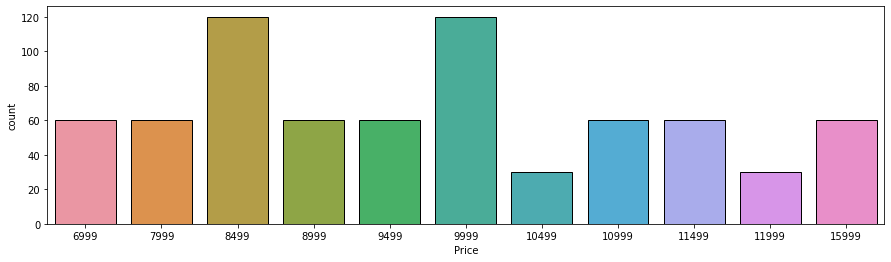

In [101]:
plt.figure(figsize = (15,4))

sns.countplot(data = Final_df, x= 'Price',edgecolor = 'black');

### Observation:
The above count plot describes about price of mobile with value count, we can observ for 8499 & 9999 there are nearly 120 mobiles are present

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


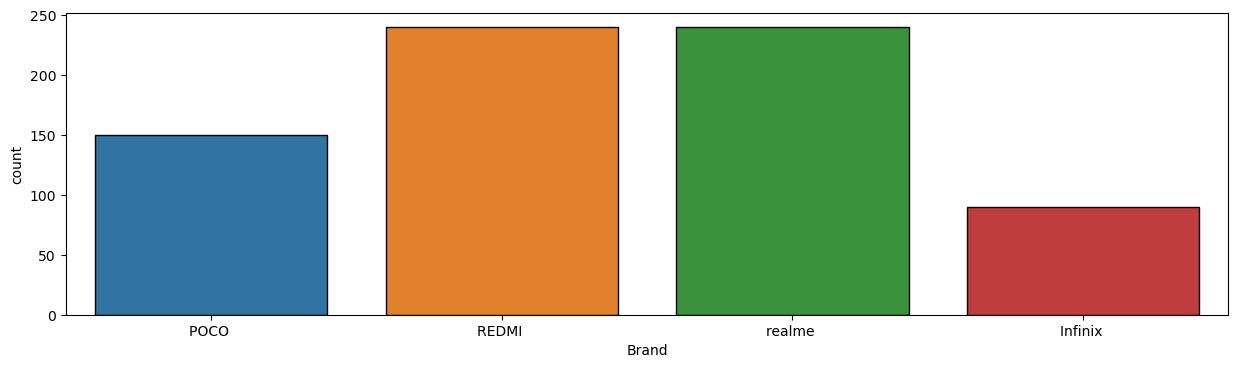

In [102]:
#mobile Brands with value counts

plt.figure(figsize=(15,4), dpi = 100)
sns.countplot(Final_df.Brand, edgecolor = 'Black');

#### Observation:
The above count plot describes mobiles with Brand name and count, we can observ realme and redmi  brands are having 250 mobiles

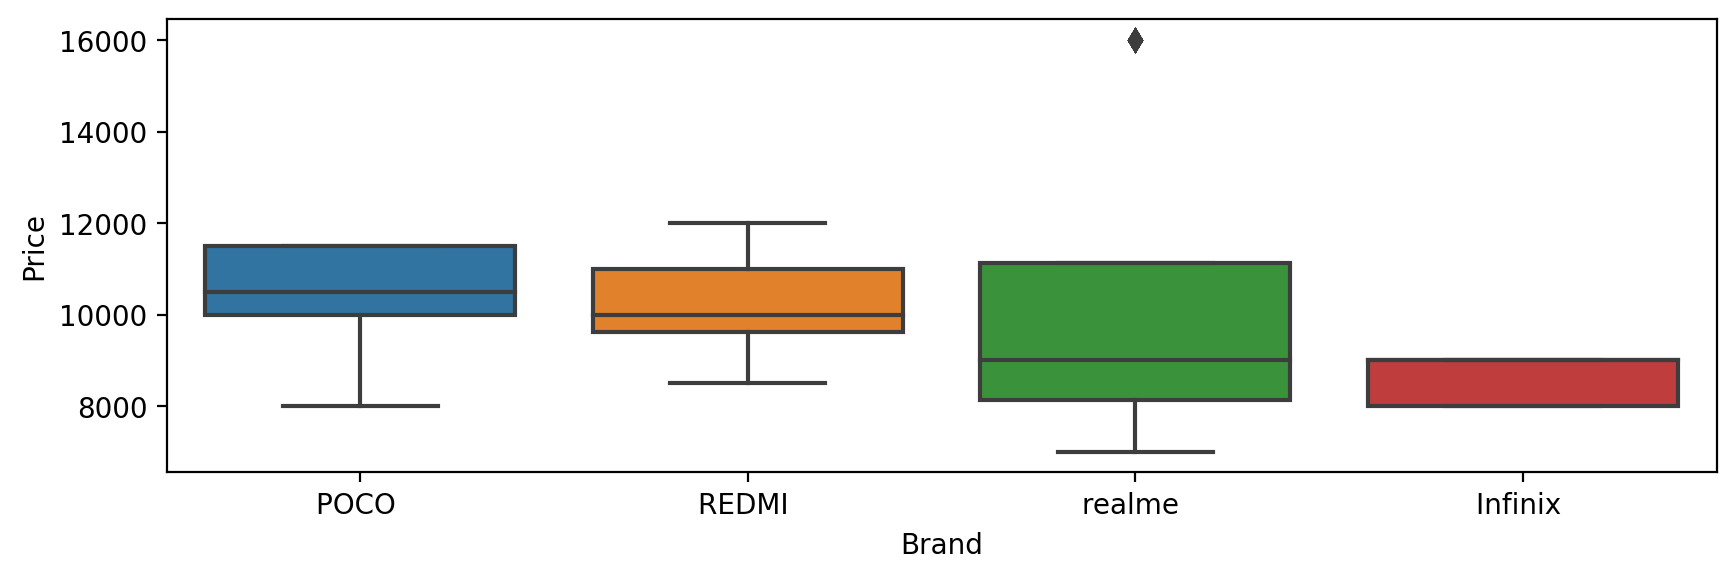

In [103]:
#bi-variate,Brand with price of mobile lies inbetween 
plt.figure(figsize=(10,3), dpi = 200)
sns.boxplot(x = Final_df.Brand, y = Final_df.Price);

#### Observation: 
The above box plot represents Brand and Price , almost all brand prices of moblies lies in between 8000 to 12000

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


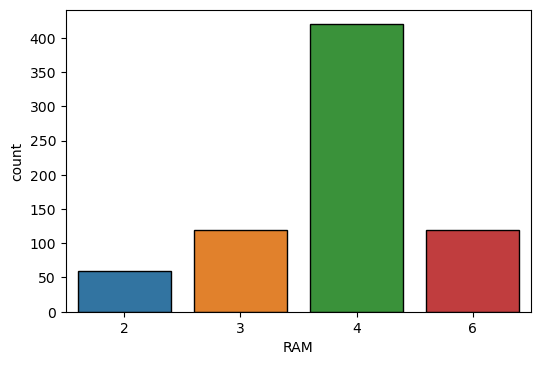

In [105]:
#mobiles with RAM

plt.figure(dpi = 100)
sns.countplot(Final_df.RAM,edgecolor = 'black');

#### Observation:
The above count plot represents with RAM , 400+ mobiles with 4GB RAM are present in Flipkart.

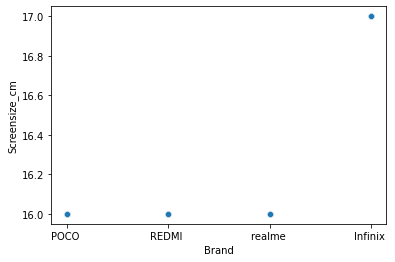

In [106]:
#bivariaate with Screensize and Brand on scatterplot
sns.scatterplot(y=df["Screensize_cm"], x=df["Brand"]);

#### Observation:
Scatterplot represents with Mobile Brand and Screensize in cm ,as we can see all the mobiles is having screensize as 16 cm except infinix

C:\Users\srava\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


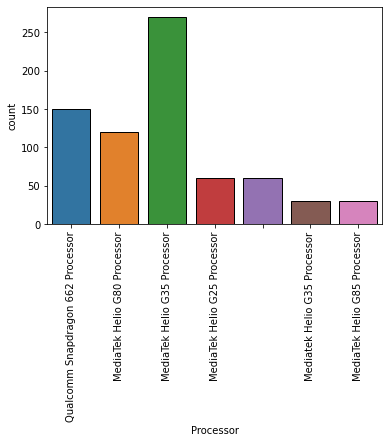

In [107]:
#mobiles with processor

sns.countplot(df.Processor,edgecolor = 'Black')
plt.xticks(rotation = 90);

#### Observation:
Above count plot describes about process, Media tek g35 and qualcomm snapdragon 662 is having more number of mobiles

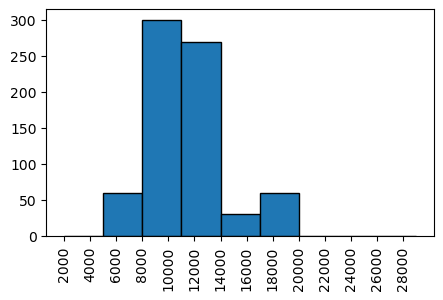

In [108]:
#histogram plot with Actual Price univariate numerical variable
plt.figure(figsize=(5,3), dpi = 100)
plt.hist(Final_df.ActualPrice, edgecolor = 'Black', bins=range(2000, 30000, 3000))
plt.xticks(range(2000, 30000, 2000),rotation = (90));

#### Observation:
The above histogram plot describes about Actual price lies in between the range of 2000 to 30000, we can observ more no of mobiles with Actualprice present with 8000 to 14000

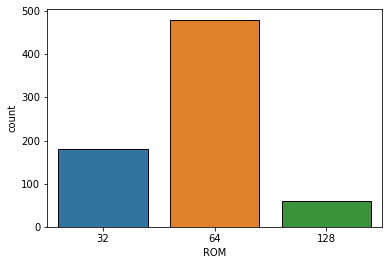

In [110]:
#count plot with ROM Univariate
sns.countplot(data =Final_df, x = 'ROM',edgecolor = 'black');

#### Observation:
The above count plot describes about mobiles with ROM, there are 450+ mobiles with 64GB ROM

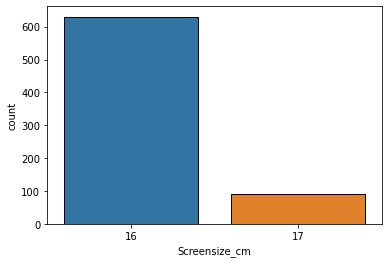

In [112]:
#countplot with Screensize in cm
sns.countplot(data = Final_df, x = 'Screensize_cm',edgecolor = 'black');

#### Observation:
The above count plot describes about Screensize in cm, almost all the mobiles are having 16 cm screensize

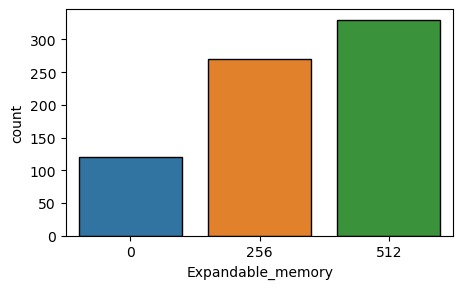

In [114]:
#countplot with expandable memory
plt.figure(figsize = (5,3),dpi = 100)
sns.countplot(data = Final_df, x = 'Expandable_memory',edgecolor = 'black');

#### Observation:
The above count plot describes about Expandable memory ,almost 300+  mobiles are having 512 GB Expandable memory

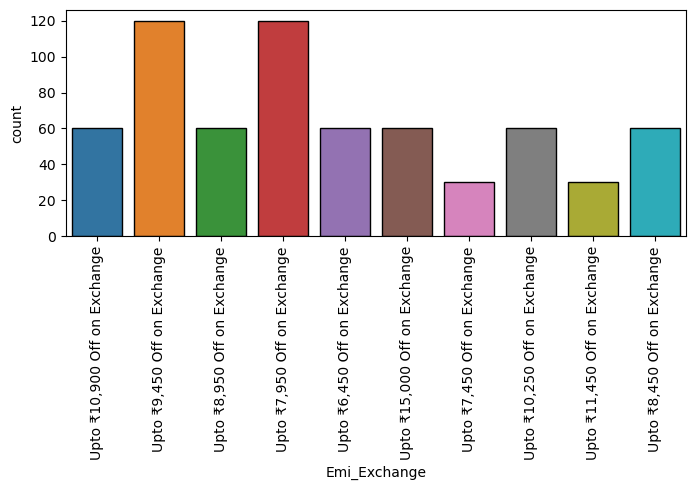

In [117]:
plt.figure(figsize = (8,3),dpi = 100)
sns.countplot(data = Final_df, x = 'Emi_Exchange',edgecolor = 'black')
plt.xticks(rotation = 90);

#### Observation:
The above count plot describes about Emi_Exchange. There are 120 mobiles present with upto 9450 and 7950 off on exchange with old mobiles

### Univariate analysis - analyzing single variable (column)

### Analyzing Single Numeric variable

In [118]:
Final_df.Price.describe()

Final_df.Price.count()
Final_df.Price.mean()
Final_df.Price.median()
Final_df.Price.quantile(0.25) # or np.percentile(Final_df.Price, 25)
Final_df.Price.quantile(0.5)
Final_df.Price.quantile(0.75)
Final_df.Price.min()
Final_df.Price.max()

count      720.000000
mean     10019.833333
std       2239.855046
min       6999.000000
25%       8499.000000
50%       9749.000000
75%      10999.000000
max      15999.000000
Name: Price, dtype: float64

720

10019.833333333334

9749.0

8499.0

9749.0

10999.0

6999

15999

## Plotting Single Numeric column

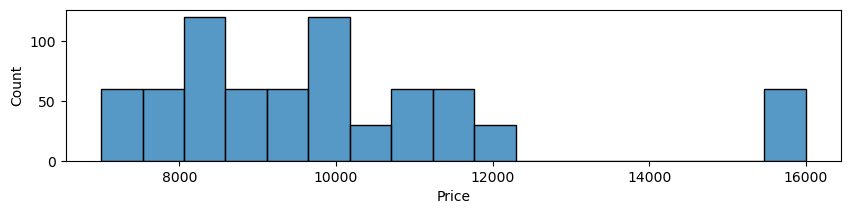

In [119]:
plt.figure(figsize=(10,2), dpi = 100)
sns.histplot(data = Final_df,x ='Price' );

#### Observation:
From the above histogram plot price and value count, most of the mobiles are present with rupees 8000 and 10,000

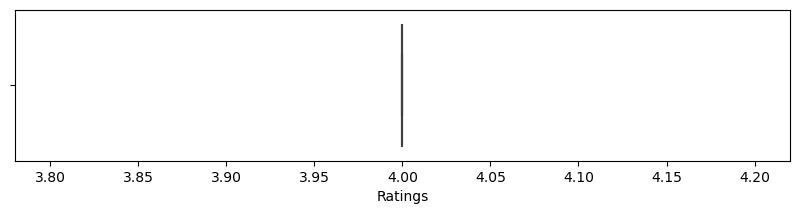

In [120]:
plt.figure(figsize=(10,2), dpi = 100)
sns.boxplot(data = Final_df,x ='Ratings');

#### Observation:
We can absorv from the above box plot, all the mobiles are having  4star ratings   

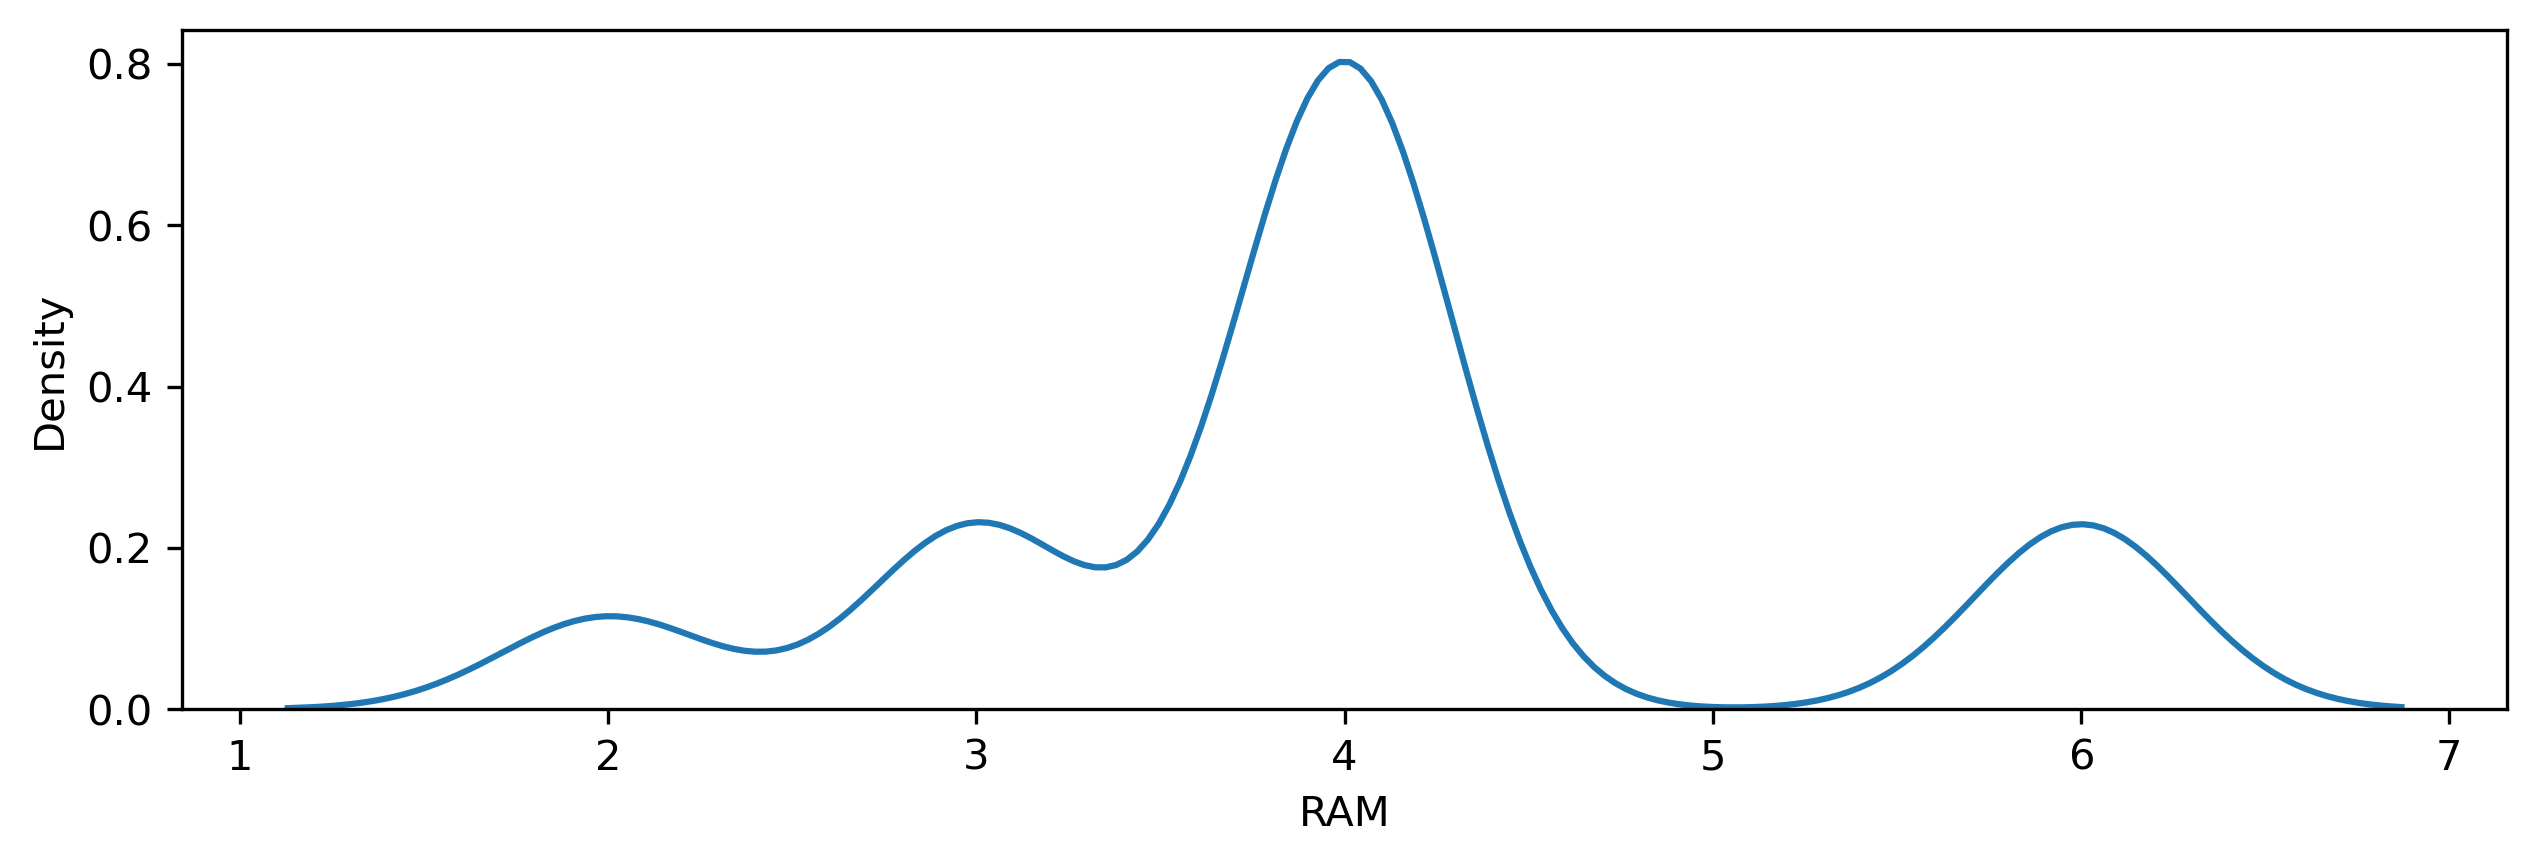

In [121]:
plt.figure(figsize=(10,3), dpi = 300)
sns.kdeplot(data = Final_df,x ='RAM');

#### Observation:
The above kde plot describes about RAM of the mobiles, most of the mobiles present with 4GB of RAM and none with 5GB and 7GB

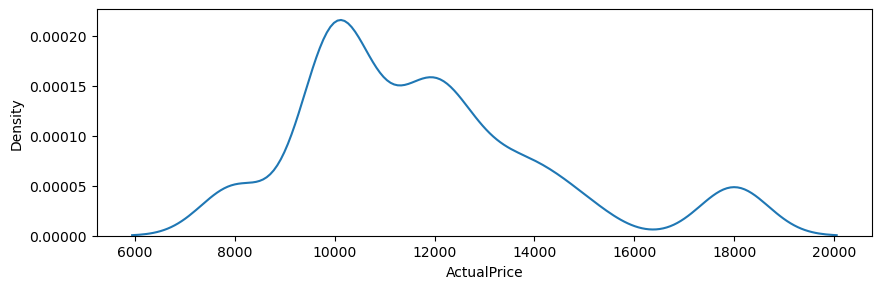

In [122]:
plt.figure(figsize=(10,3), dpi = 100)
sns.kdeplot(data = Final_df,x ='ActualPrice');

#### Observation:
The above Kdeeplot describes about Actualprice, for rupees 10000 is having more no of mobiles an the least with 20000  

In [123]:
Final_df.Price.skew()

1.324080555878607

### Analyzing Single Categorical variable

In [124]:
Final_df.Brand.describe()

Final_df.Brand.count()
Final_df.Brand.value_counts()
Final_df.Brand.unique()

count        720
unique         4
top       REDMI 
freq         240
Name: Brand, dtype: object

720

REDMI       240
realme      240
POCO        150
Infinix      90
Name: Brand, dtype: int64

array(['POCO ', 'REDMI ', 'realme ', 'Infinix '], dtype=object)

In [125]:
Final_df.Processor.describe()

Final_df.Processor.count()
Final_df.Processor.value_counts()
Final_df.Processor.unique()

count                              720
unique                               7
top       MediaTek Helio G35 Processor
freq                               270
Name: Processor, dtype: object

720

MediaTek Helio G35 Processor         270
Qualcomm Snapdragon 662 Processor    150
MediaTek Helio G80 Processor         120
MediaTek Helio G25 Processor          60
                                      60
MediaTek Helio G85 Processor          30
Mediatek Helio G35 Processor          30
Name: Processor, dtype: int64

array(['Qualcomm Snapdragon 662 Processor',
       'MediaTek Helio G80 Processor', 'MediaTek Helio G35 Processor',
       'MediaTek Helio G25 Processor', '', 'Mediatek Helio G35 Processor',
       'MediaTek Helio G85 Processor'], dtype=object)

### Plotting Single Categorical column

##### Which Brand is providing More Mobiles

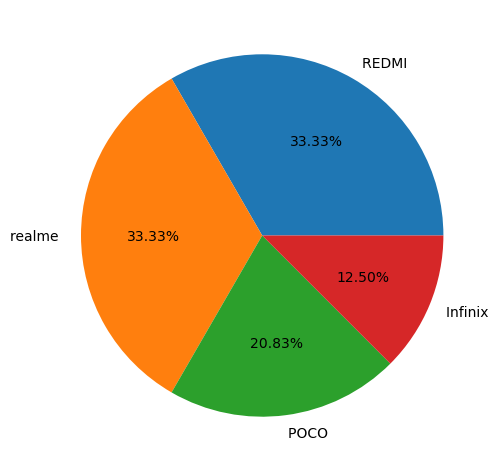

In [126]:
plt.figure(figsize=(20,6), dpi = 100)
plt.pie(Final_df.Brand.value_counts().values, labels=Final_df.Brand.value_counts().index, autopct='%.2f%%');

#### Observation:
The above Pie chart describes about mobile Brands, Realme and Redmi have the most number of mobiles with 33.33% and Infinix has the lesat mobile count with 12.50%

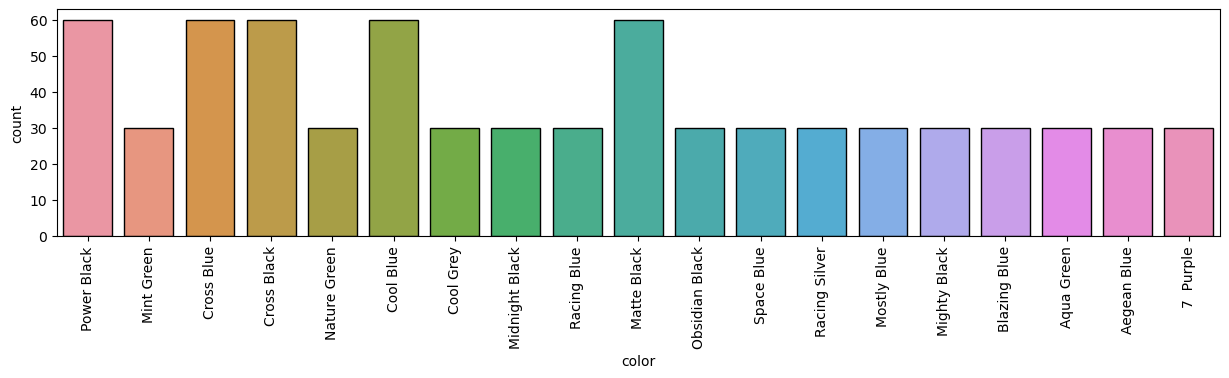

In [128]:
plt.figure(figsize=(15,3), dpi = 100)
sns.countplot(data = Final_df, x = 'color',edgecolor = 'Black')
plt.xticks(rotation= 90) ;

#### Observation:
we can abserv from the above count plot there are differnt colours for mobile and their counts for number of mobiles present for specific colour

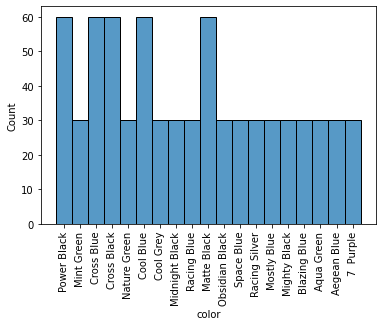

In [129]:
sns.histplot(data = Final_df,x = 'color')
plt.xticks(rotation = 90);

#### Observation:
Histogram plot with mobile colour and their value counts

## Bivariate Analysis

### Numerical-Numerical variables

##### Which Brand is giving heighest discount percentage

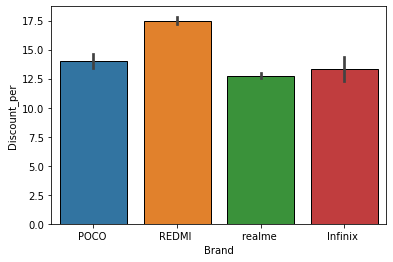

<Figure size 2400x800 with 0 Axes>

In [162]:
sns.barplot(x = Final_df.Brand,y = Final_df.Discount_per ,edgecolor ='Black')
plt.figure(figsize = (12,4),dpi = 200);

#### Observation:
    Redmi Brand is giving the heighest discount Percentage

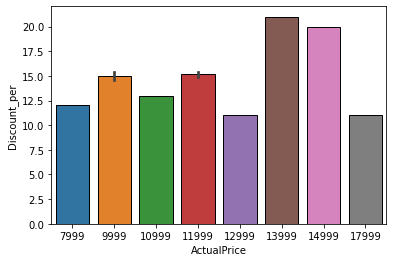

<Figure size 2400x800 with 0 Axes>

In [130]:
sns.barplot(x = Final_df.ActualPrice,y = Final_df.Discount_per ,edgecolor ='Black')
plt.figure(figsize = (12,4),dpi = 200);

#### Observation:
From the above Bar plot it describes about Actual price and Discount percent of the mobiles, there are more number of mobiles present Actual price of rupees 13999 and Discount percent is also high with amlomst 20% 

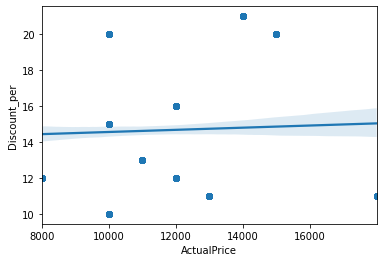

In [131]:
sns.regplot(x = Final_df.ActualPrice,y = Final_df.Discount_per);

#### Observation:
The above Regression plot describes about Actual price and Discount percent, more numbers of mobiles are present with rupees 14000 with discount percent as 27.5

In [132]:
Final_df.corr()

,Ratings,ActualPrice,Discount_per,Price,RAM,ROM,Battery,Screensize_cm,Screensize_in,Expandable_memory
Ratings,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ActualPrice,NaN,1.000000,0.043342,0.979297,0.786901,0.852206,0.060744,-0.265650,NaN,-0.345715
Discount_per,NaN,0.043342,1.000000,-0.155137,-0.328791,-0.322244,-0.028936,-0.143177,NaN,0.021480
Price,NaN,0.979297,-0.155137,1.000000,0.844488,0.908246,0.054432,-0.228668,NaN,-0.345702
RAM,NaN,0.786901,-0.328791,0.844488,1.000000,0.812976,0.246701,-0.116642,NaN,-0.052498
ROM,NaN,0.852206,-0.322244,0.908246,0.812976,1.000000,-0.038218,-0.124461,NaN,-0.329880
Battery,NaN,0.060744,-0.028936,0.054432,0.246701,-0.038218,1.000000,0.534462,NaN,-0.154323
Screensize_cm,NaN,-0.265650,-0.143177,-0.228668,-0.116642,-0.124461,0.534462,1.000000,NaN,-0.150027
Screensize_in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expandable_memory,NaN,-0.345715,0.021480,-0.345702,-0.052498,-0.329880,-0.154323,-0.150027,NaN,1.000000


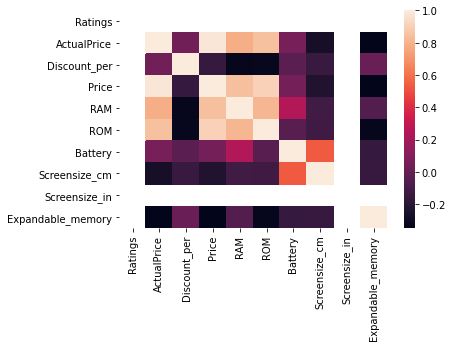

In [133]:
sns.heatmap(Final_df.corr());

#### Observation:
The above Heat map represents correlated data dark colour represents with low or negative correlation and light colour with high correlated values 

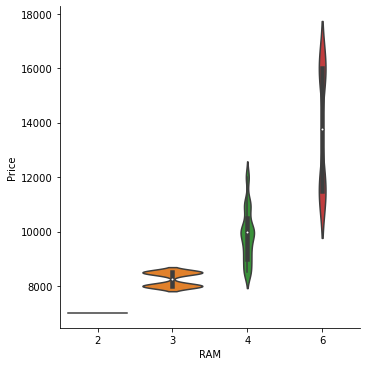

In [137]:
sns.catplot(data = Final_df,x = 'RAM',y = 'Price',kind = 'violin');

#### Observation:
The above catplot with violin kind represents RAM and Price, mobiles with 6GB RAM and  has the highest Mobiles present in flipkart

### Numerical-Categorical data

##### Which Mobile is having highest Price and lowest In Flipkart

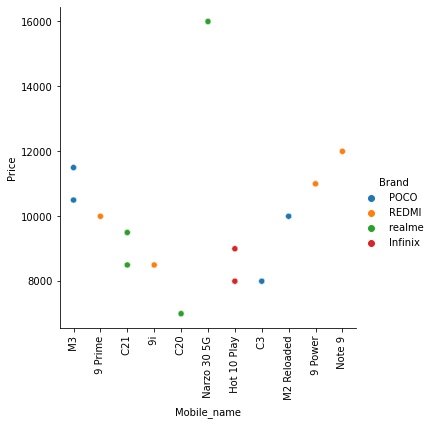

<Figure size 1500x500 with 0 Axes>

In [138]:
sns.relplot(data = Final_df,x = 'Mobile_name',y = 'Price',hue = 'Brand')
plt.xticks(rotation = 90)
plt.figure(figsize = (15,5),dpi = 100);

#### Observation:
The above Relational plot represents with Mobile name and Price with hue as Brand, Realme Narzo 30 5G Mobile has the highest price with rupees 16000 and realme c20 has the lowest with 6,000

### Categorical-Numerical

##### What is the Average Expandable Memory Of Mobiles

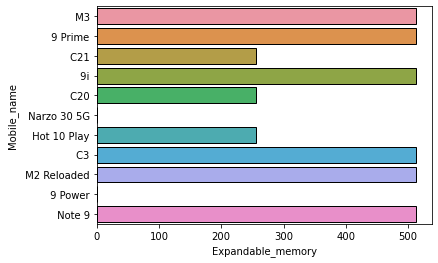

In [170]:
sns.barplot(data = Final_df,y = 'Mobile_name', x = 'Expandable_memory',edgecolor = 'Black');

#### Observation:
    70% of the mobiles are having Memory_Exapndable upto 512GB
    

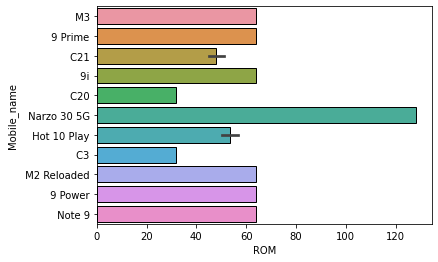

In [174]:
sns.barplot(data = Final_df,y = 'Mobile_name', x = 'ROM',edgecolor = 'Black');

#### Observation:
The above barplot describes about Mobiles names with ROM,  Narzo 30 5G mobile has the highest ROM

### categorical Categorical

##### Which Brand has the more colour Variations

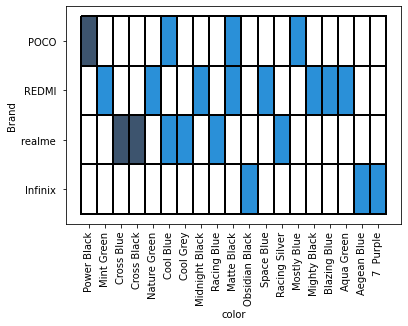

In [160]:
sns.histplot(data = Final_df,y = 'Brand', x = 'color',edgecolor = 'Black')
plt.xticks(rotation = 90);

### Observation: 
The above Histogram plot represent the color variations with Brands

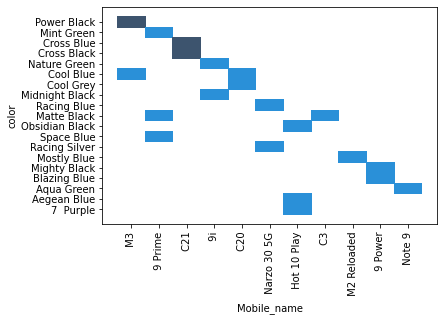

<Figure size 600x400 with 0 Axes>

In [140]:
sns.histplot(x = Final_df.Mobile_name, y = Final_df.color)
plt.xticks(rotation = 90)
plt.figure(dpi = 100);

#### Observatin:
Above histogram plot represents about Mobile name and colour, dark colour reoresents with more number of mobiles present in that particular colour and light colour represents about less number of colours with particular colour in flipcark data

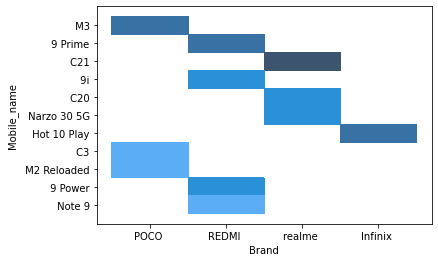

In [141]:
sns.histplot(x = Final_df.Brand,y = Final_df.Mobile_name);

#### Observsation:
The above Histogram represents with Mobile Brand and Mobile colour, dark colour represent number of mobiles present in it and also light colour represent less mobiles

### Multivariate

In [143]:
df1 = pd.DataFrame(np.random.random((3,3)),columns = ['ActualPrice','Discount_per','Price'])

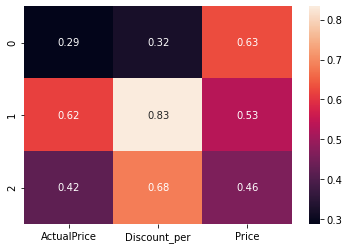

In [144]:
sns.heatmap(df1,annot = True);

#### Observation:
The above heat map shows all the correlated values of the data

In [145]:
df2 = pd.DataFrame(np.random.random((4,4)),columns = ['Expandable_memory','Screensize_cm','Screensize_in','Battery'])

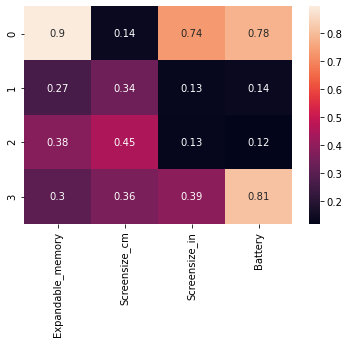

In [146]:
sns.heatmap(df2,annot = True );

#### The above Heat Map shows all the correlated values of the data

In [147]:
Final_df.groupby(['Brand','Mobile_name','color'])[['ActualPrice']].mean()

ActualPrice
Brand    Mobile_name  color                      
Infinix   Hot 10 Play 7  Purple              9999
                      Aegean Blue            9999
                      Obsidian Black         9999
POCO      C3          Matte Black            9999
          M2 Reloaded Mostly Blue           11999
          M3          Cool Blue             12999
                      Power Black           12499
REDMI     9 Power     Blazing Blue          13999
                      Mighty Black          13999
          9 Prime     Matte Black           11999
                      Mint Green            11999
                      Space Blue            11999
          9i          Midnight Black         9999
                      Nature Green           9999
          Note 9      Aqua Green            14999
realme    C20         Cool Blue              7999
                      Cool Grey              7999
          C21         Cross Black           10499
                      Cross Blue            10499
          Narzo 30 5G Racing Blue           17999
                      Racing Silver         17999

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Ratings            720 non-null    int32 
 1   ActualPrice        720 non-null    int32 
 2   Discount_per       720 non-null    int32 
 3   Price              720 non-null    int32 
 4   Emi_Exchange       660 non-null    object
 5   Brand              720 non-null    object
 6   Mobile_name        720 non-null    object
 7   color              720 non-null    object
 8   RAM                720 non-null    int32 
 9   ROM                720 non-null    int32 
 10  Screensize_cm      720 non-null    int32 
 11  Screensize_in      720 non-null    int32 
 12  Expandable_memory  720 non-null    int64 
 13  Battery            720 non-null    int32 
 14  Processor          720 non-null    object
dtypes: int32(9), int64(1), object(5)
memory usage: 59.2+ KB


#### Observation:
The above groupby analysis describes about Brand, Mobile Name, Mobile colour and Price

## Conclusion:

### Realme Narzo 30 5G Mobile has the highest price with rupees 16000 and realme c20 has the lowest with 6000 in Flipkart

### Realme and Redmi mobiles are having best features with less price

### Realme and Redmi brands are having more mobiles with 33.33%

### Realme Narzo30 5G is having 6GB RAM and 128 GB ROM

### Mediatech Helio G35 processor is used by more number of Mobiles

### Redmi Mobile Brand have more colour variations

### Redmi Mobile Brand is having the heighest Discount percentages

### 70% of the mobiles are having Memory_Exapndable upto 512GB

# HENCE REDMI IS THE FIRST PREFERED AND REALME IS THE SECOND PREFERED BRAND ACCORDING TO MY DATA 